In [1]:
import pandas as pd
from prophet import Prophet

d:\learn\bigdata-project\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [2]:
def prophet_finder(df, width=0.6):
    df = df.copy()
    df.rename(columns={'x': 'ds'}, inplace=True)
    m = Prophet(interval_width=width)
    m.fit(df)
    pred = m.predict(df)
    m.plot(pred, figsize=(20, 7))
    return (df['y'] < pred['yhat_lower']) | (df['y'] > pred['yhat_upper'])

In [3]:
df = pd.read_csv('../datasets/df_all.csv', engine='pyarrow')

In [4]:
df['dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
df['pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

22:38:26 - cmdstanpy - INFO - Chain [1] start processing
22:38:26 - cmdstanpy - INFO - Chain [1] done processing


<Axes: xlabel='x', ylabel='y'>

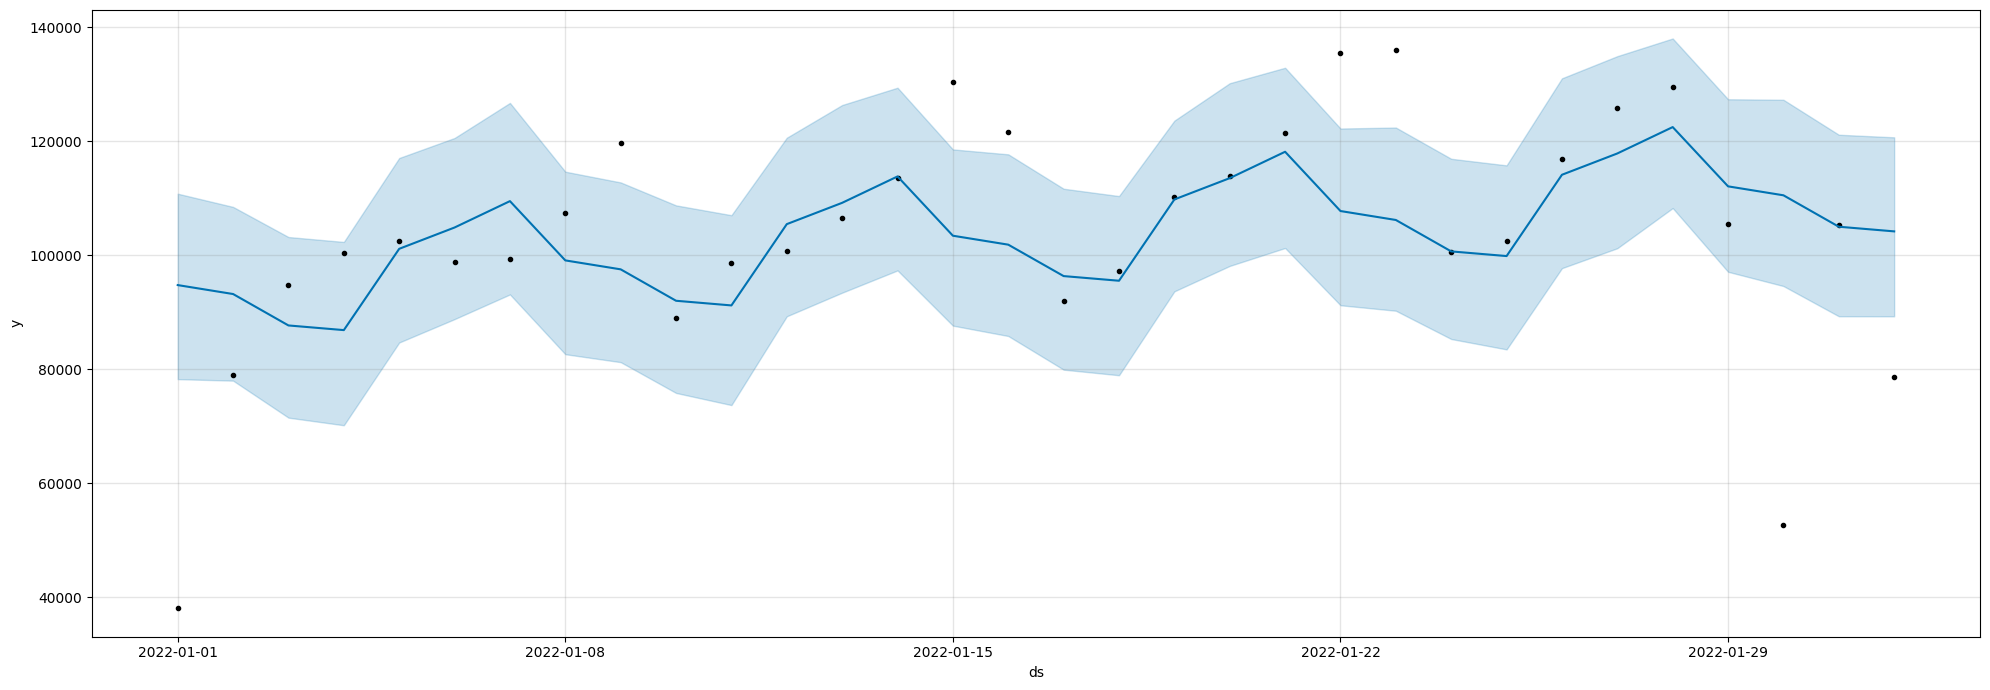

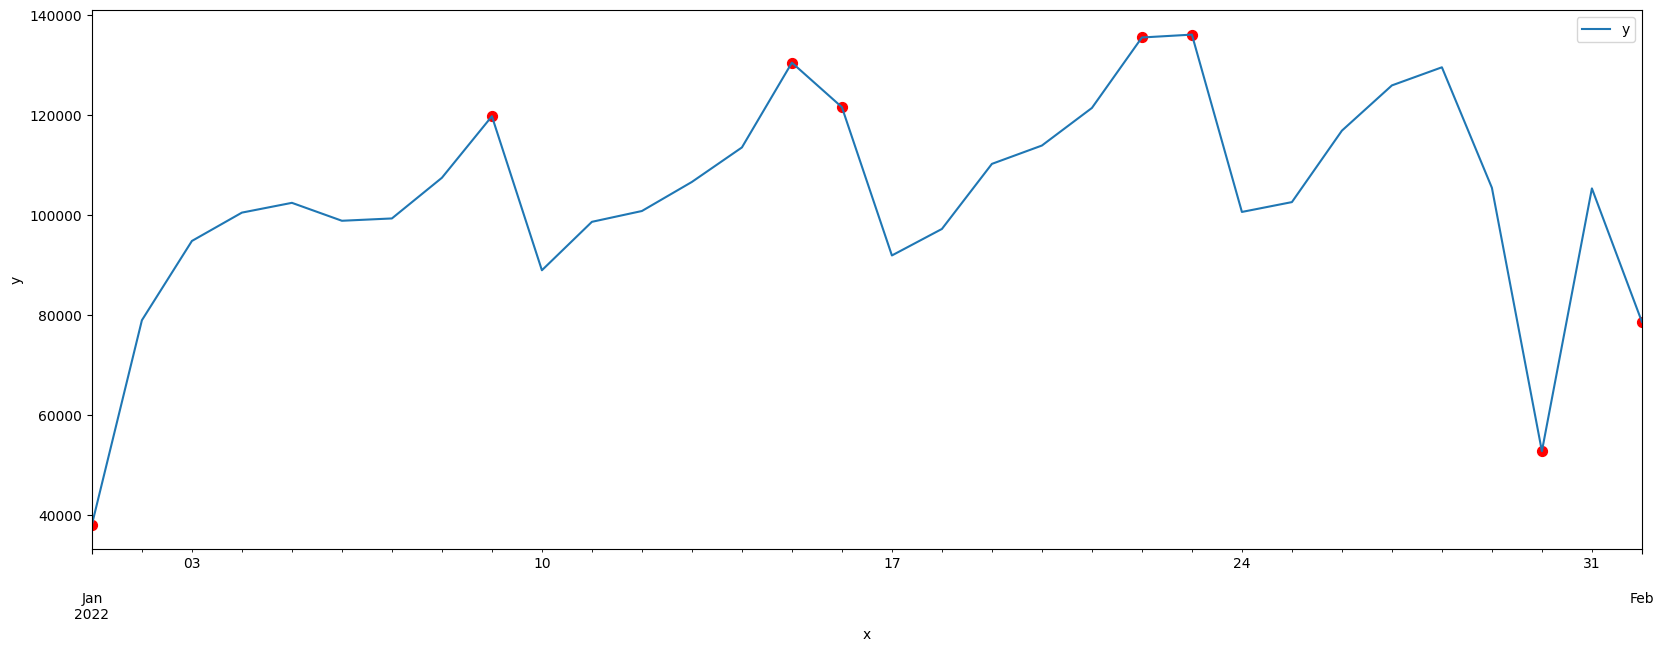

In [11]:
df_dates = df[["dropoff_datetime", "passenger_count"]].copy()
df_dates["dropoff_datetime"] = df_dates["dropoff_datetime"].dt.round('D')
df_dates = df_dates.groupby(by="dropoff_datetime").sum().reset_index()

df_dates = df_dates[(df_dates['dropoff_datetime'] > '2010') & (df_dates['dropoff_datetime'] < '2022-02-2')].reset_index()


df_dates = df_dates.rename(columns={'dropoff_datetime': 'x', 'passenger_count': 'y'})
res = prophet_finder(df_dates)
ax = df_dates.plot('x', 'y', figsize=(20, 7))
df_dates.reset_index().loc[res].plot.scatter('x', 'y', ax=ax, s=50, c='r')

In [12]:
df = pd.read_csv('../datasets/yellow_tripdata_2016-01.csv', usecols=['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance'], engine='pyarrow')

In [13]:
df['dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
df['pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

22:39:09 - cmdstanpy - INFO - Chain [1] start processing
22:39:09 - cmdstanpy - INFO - Chain [1] done processing


<Axes: xlabel='dropoff_datetime', ylabel='passenger_count'>

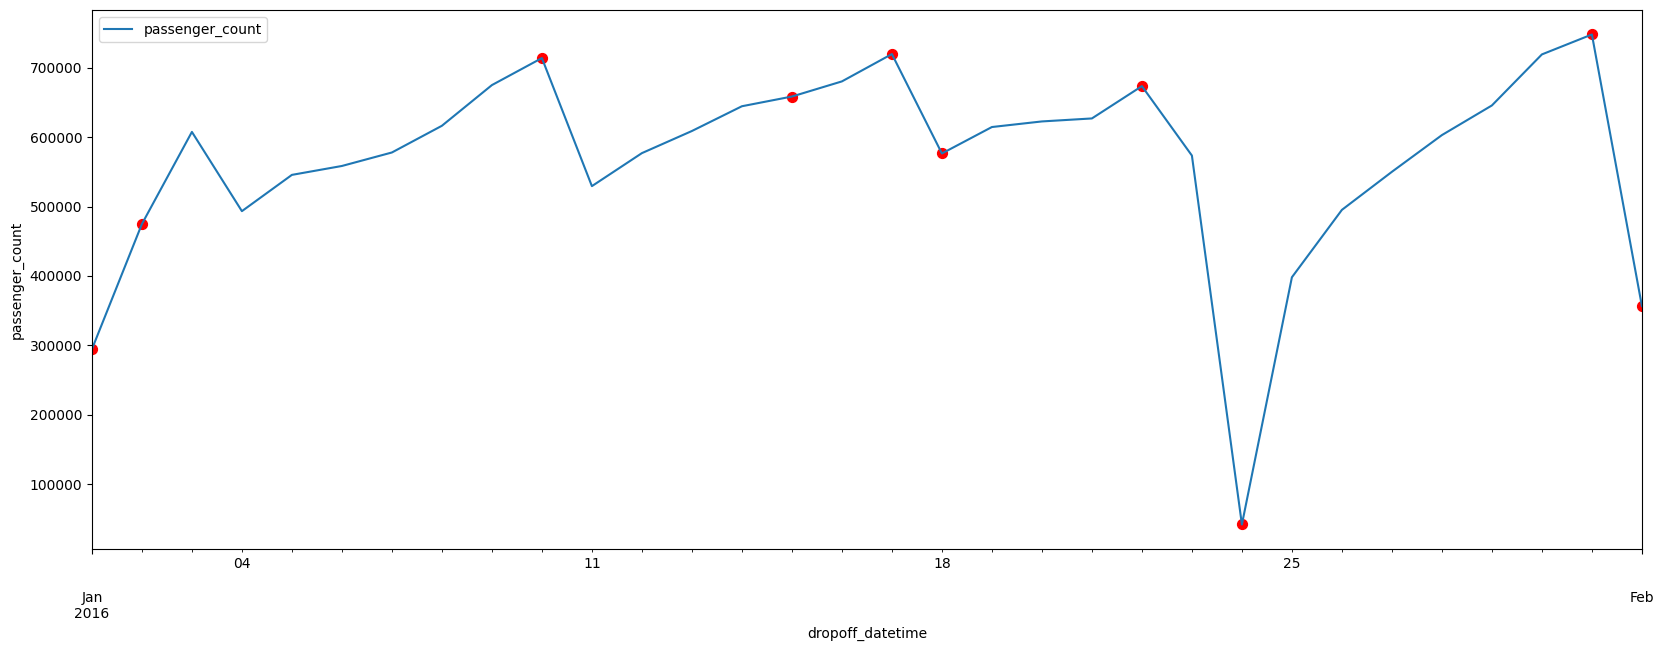

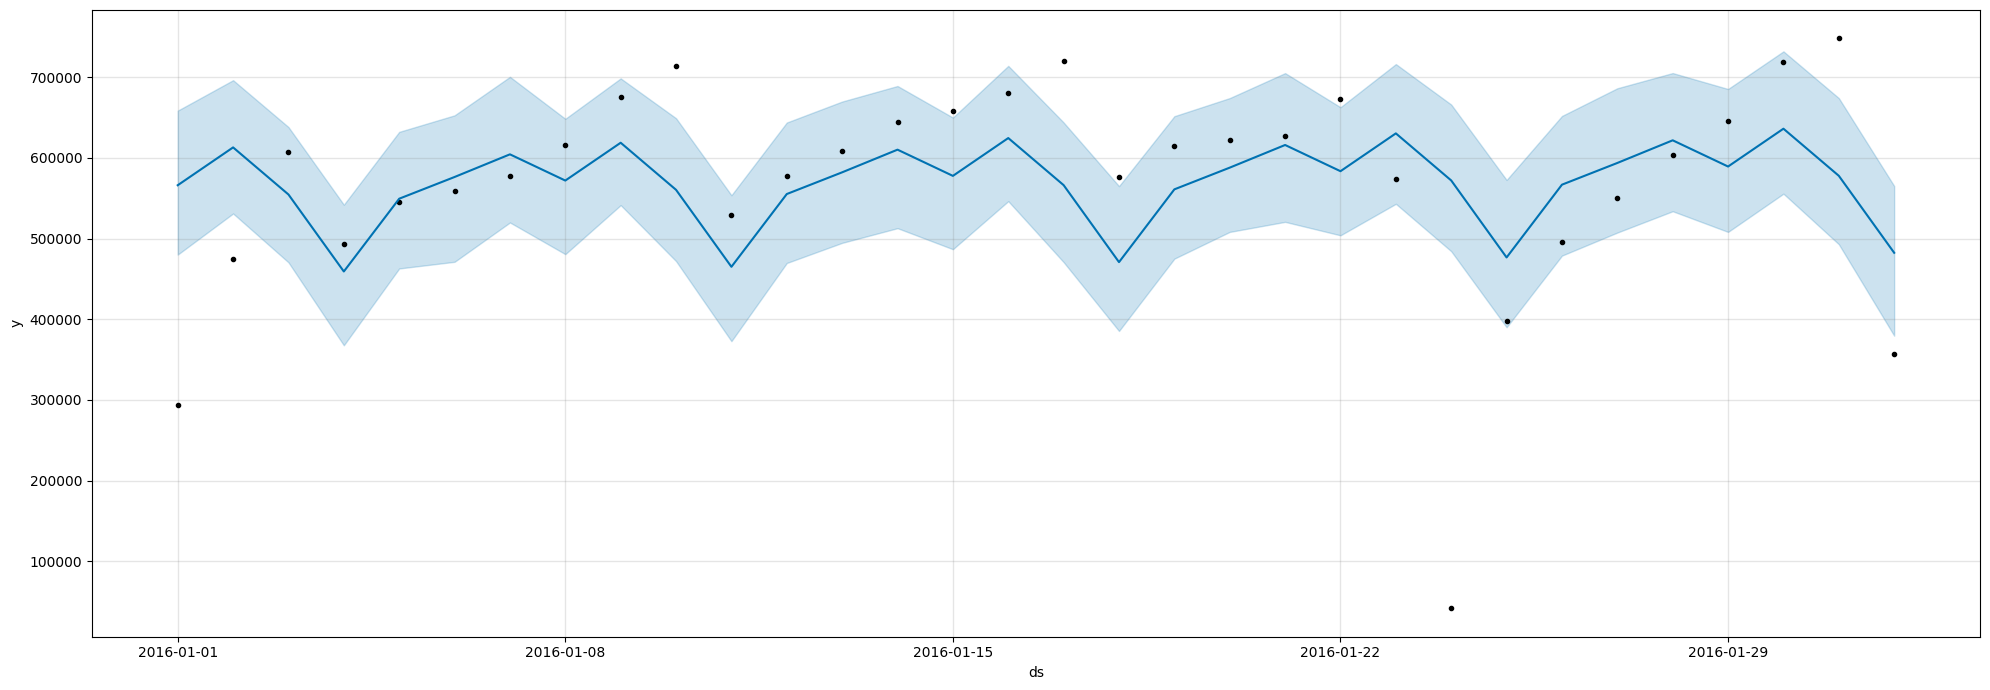

In [14]:
df_dates = df[["dropoff_datetime", "passenger_count"]].copy()
df_dates["dropoff_datetime"] = df_dates["dropoff_datetime"].dt.round('D')
df_dates = df_dates.groupby(by="dropoff_datetime").sum().reset_index()
df_dates = df_dates[df_dates['dropoff_datetime'] < '2016-02-02']

ax = df_dates.plot(x="dropoff_datetime", y="passenger_count", figsize=(20, 7))
res = prophet_finder(df_dates.rename(columns={'dropoff_datetime': 'x',  'passenger_count': 'y'}), width=0.5)
df_dates.reset_index()[res].plot.scatter("dropoff_datetime", "passenger_count", ax=ax, s=50, c='r')

In [15]:
df = pd.read_csv("../datasets/dataset.csv", engine='pyarrow', usecols=["timestamp", "value"])

22:41:29 - cmdstanpy - INFO - Chain [1] start processing
22:41:29 - cmdstanpy - INFO - Chain [1] done processing


<Axes: xlabel='timestamp', ylabel='value'>

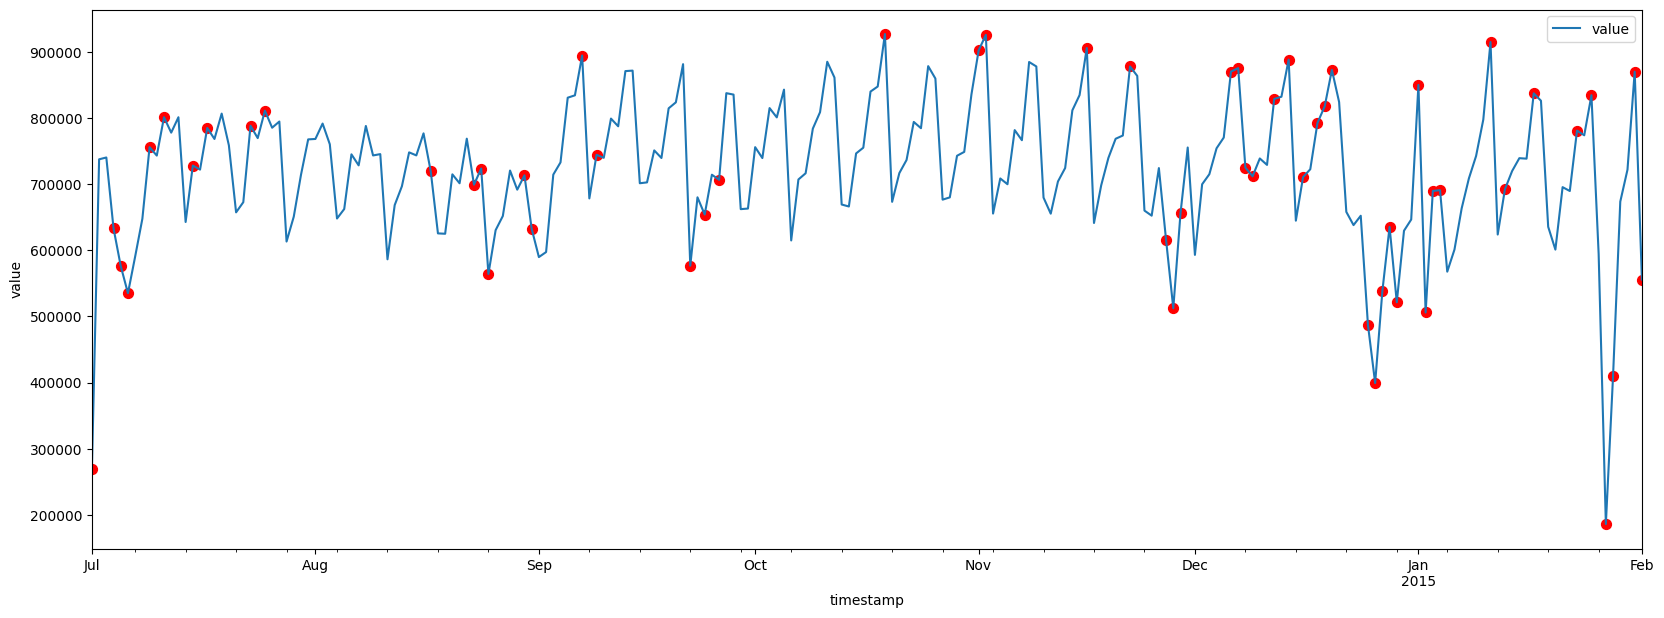

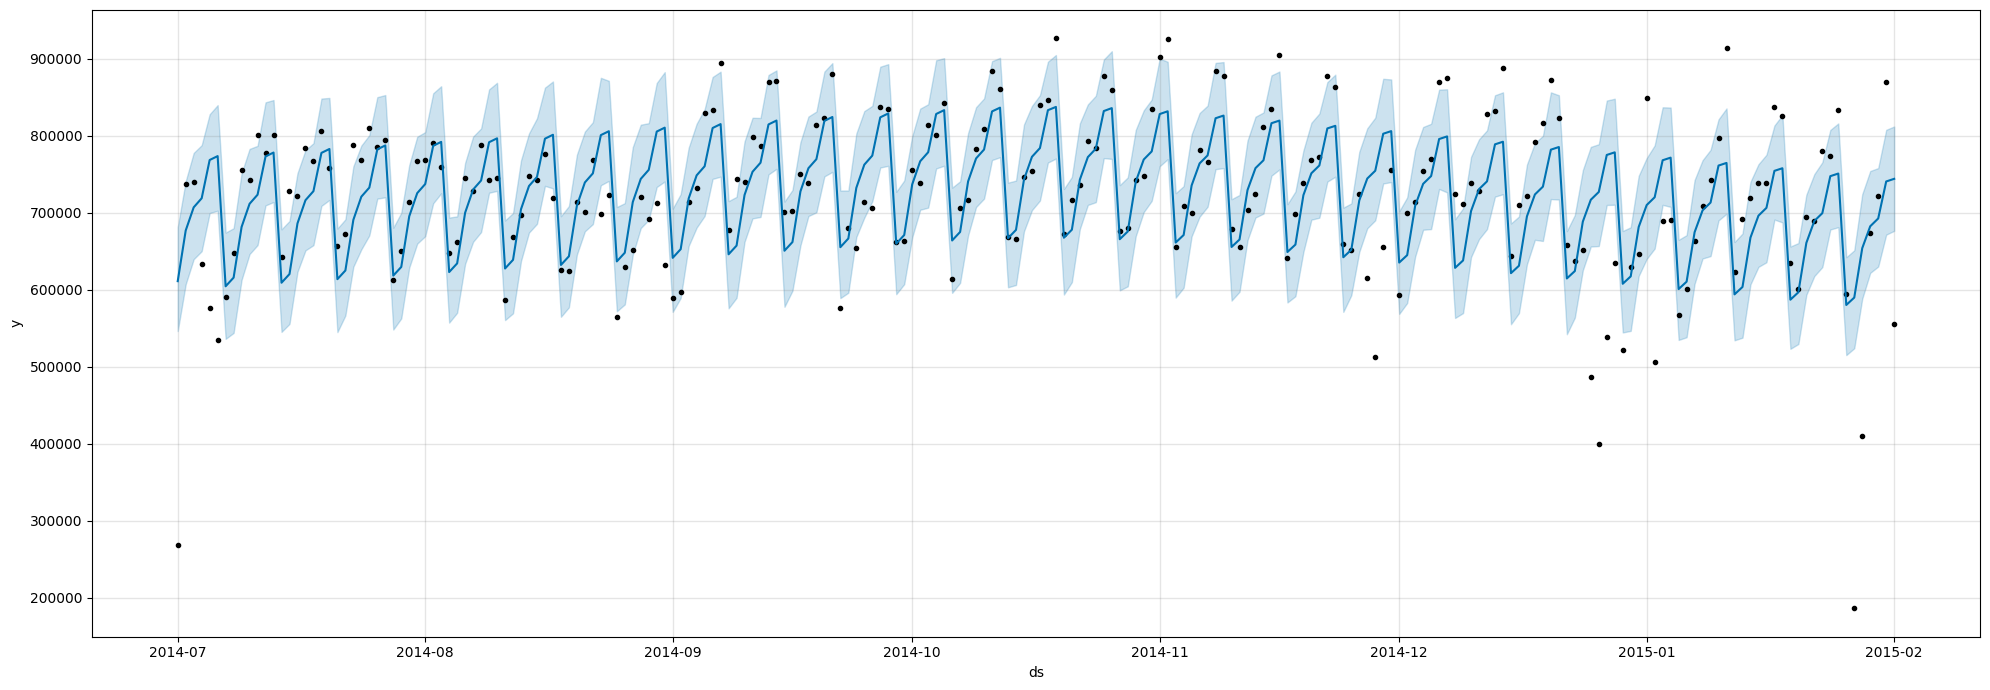

In [19]:
df_dates = df[["timestamp", "value"]].copy()
df_dates["timestamp"] = df_dates["timestamp"].dt.round('D')
df_dates = df_dates.groupby(by="timestamp").sum().reset_index()
ax = df_dates.plot(x="timestamp", y="value", figsize=(20, 7))
res = prophet_finder(df_dates.rename(columns={'timestamp': 'x', 'value': 'y'}))
df_dates[res].plot.scatter(x="timestamp", y="value", ax=ax, s=50, c='r')

22:42:06 - cmdstanpy - INFO - Chain [1] start processing
22:42:06 - cmdstanpy - INFO - Chain [1] done processing


<Axes: xlabel='timestamp', ylabel='value'>

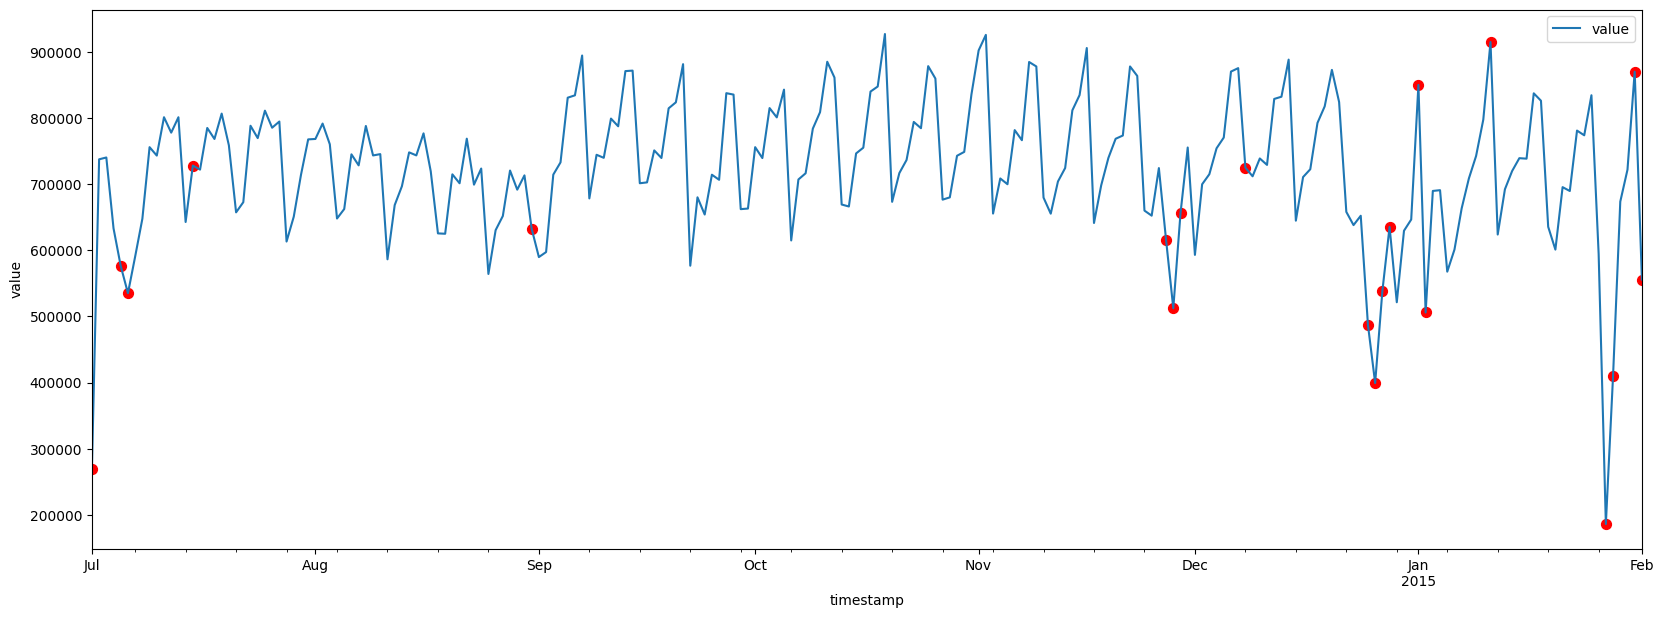

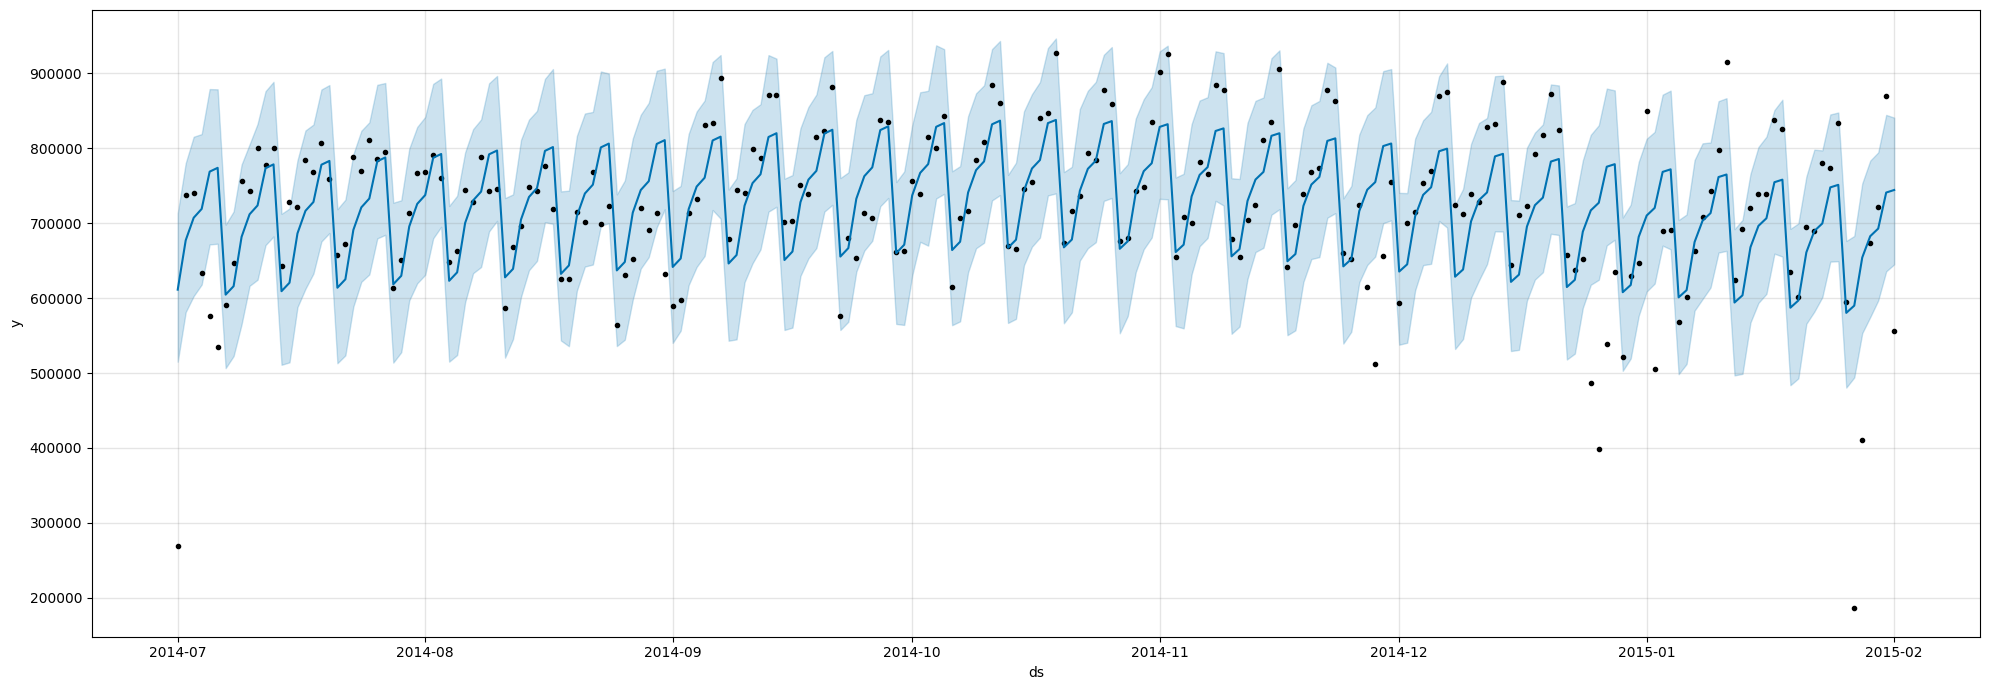

In [21]:
ax = df_dates.plot(x="timestamp", y="value", figsize=(20, 7))
res = prophet_finder(df_dates.rename(columns={'timestamp': 'x', 'value': 'y'}), width=0.8)
df_dates[res].plot.scatter(x="timestamp", y="value", ax=ax, s=50, c='r')

In [4]:
df = pd.read_csv("../datasets/taxi_tripdata.csv", engine='pyarrow', usecols=["lpep_dropoff_datetime", "passenger_count", "trip_distance"])

12:33:29 - cmdstanpy - INFO - Chain [1] start processing
12:33:29 - cmdstanpy - INFO - Chain [1] done processing


<Axes: xlabel='x', ylabel='y'>

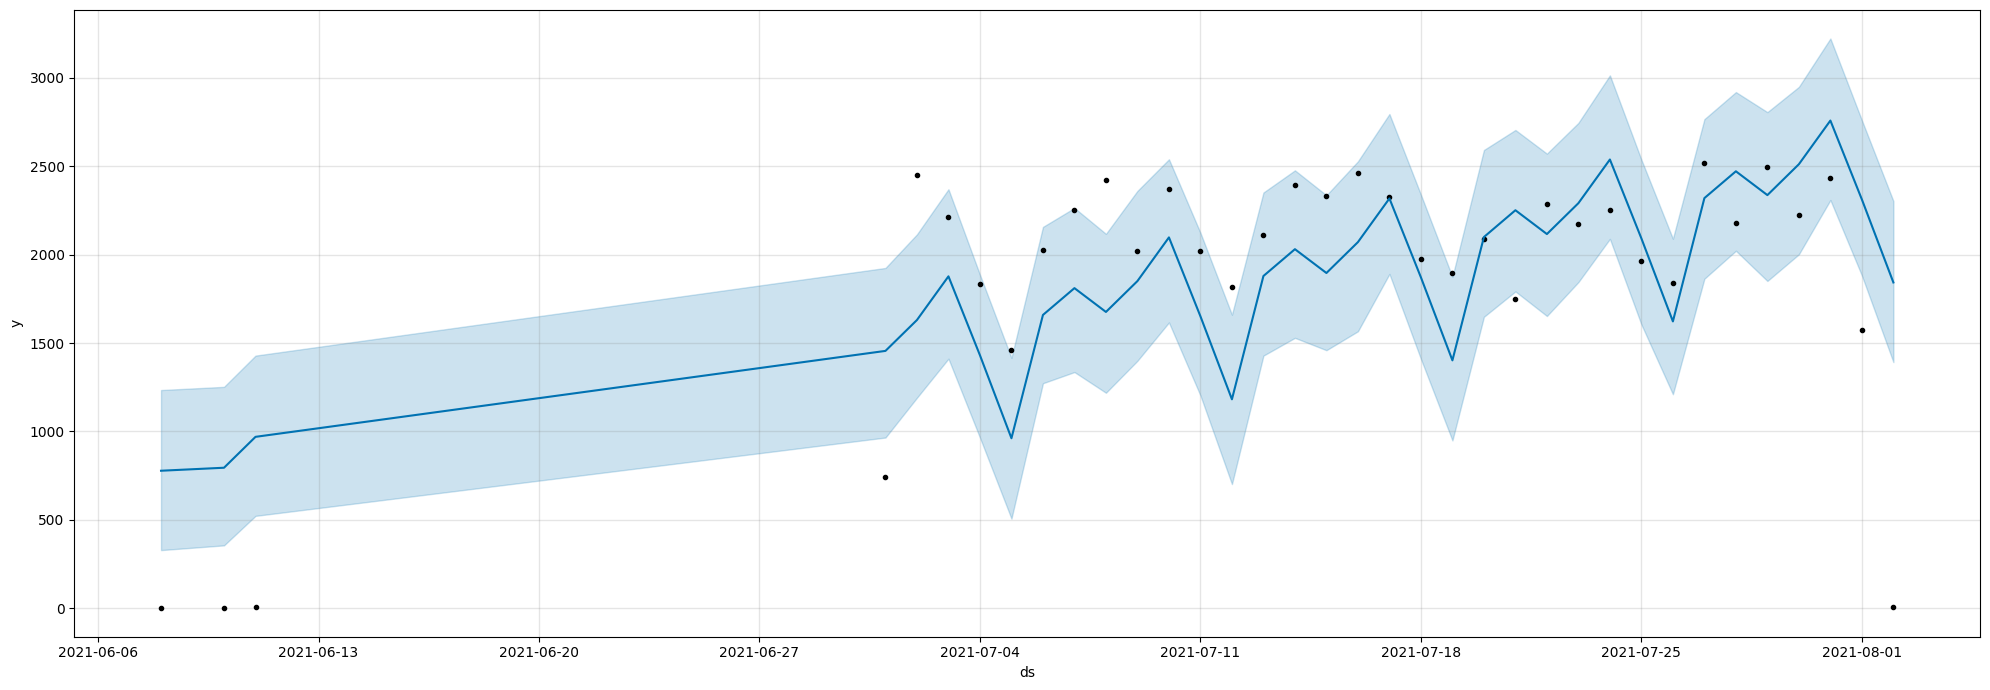

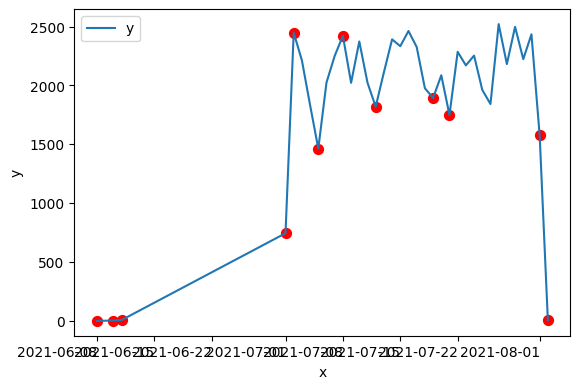

In [8]:
df_dates = df[["lpep_dropoff_datetime", "passenger_count"]].copy()
df_dates = df_dates.dropna()
df_dates["lpep_dropoff_datetime"] = df_dates["lpep_dropoff_datetime"].dt.round('D')
df_dates = df_dates.groupby(by="lpep_dropoff_datetime").sum().reset_index()
df_dates = df_dates[(df_dates["lpep_dropoff_datetime"].dt.year == 2021) & (df_dates["passenger_count"] != 0)]
df_dates.rename(columns={'lpep_dropoff_datetime': 'x', 'passenger_count': 'y'}, inplace=True)
df_dates = df_dates.reset_index()
res = prophet_finder(df_dates)
ax = df_dates.plot('x', 'y')
df_dates[res].plot.scatter('x', 'y', ax=ax, s=50, c='r')